# Spotify Hit Predictor

In [148]:
import pandas as pd
import glob
import os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

## The Data

We are using a dataset from Kaggle that was fetched using Spotify’s API. The dataset consists of 41,106 different songs ranging from the years 1960-2019 and 19 columns describing each song. Below is a short description of each of the columns as provided by the author of the Kaggle dataset we are using. A more descriptive version of each column can be found at: https://www.kaggle.com/theoverman/the-spotify-hit-predictor-dataset/data.


In [149]:
# Load data from multiple csv files
def load_data():
    path = r'/Users/amandachan/Desktop/the-spotify-hit-predictor-dataset'
    all_files = glob.glob(os.path.join(path, "*.csv"))
    df = pd.concat((pd.read_csv(f) for f in all_files))
    return df

df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.527   0.316    1   -15.769     1       0.0310      0.693000   
1         0.738   0.541    1    -5.485     1       0.0311      0.559000   
2         0.736   0.419    0   -10.662     1       0.0300      0.693000   
3         0.565   0.594    5   -13.086     1       0.0646      0.655000   
4         0.513   0.760    4   -10.077     1       0.0355      0.000017   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.00699    0.1680    0.543  116.211       158840               4   
1           0.00000    0.0492    0.309  134.187       387573               4   
2           0.49500    0.0809    0.265   93.982       237267               4   
3           0.92600    0.6750    0.763  114.219       375933               4   
4           0.00339    0.1530    0.961  153.166       430653               4   

   chorus_hit  sections  target  
0    53.89523         6       0  
1    32.16853        16       1  
2    42.05369         9       0  
3    80.99693        10       0  
4    25.57331        20       0

**Original Variables**

1. **track**: The name of the track.

2. **artist**: The name of the artist.

3. **uri**: The resource identifier for the track.

4. **danceability**: Danceability describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.

5. **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.

6. **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. If no key was detected, the value is -1.

7. **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.

8. **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

9. **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value.

10. **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

11. **instrumental**: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

12. **liveness**: Detects the presence of an audience in the recording. A value above 0.8 provides a strong likelihood that the track is live.

13. **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

14. **tempo**: The overall estimated tempo of a track in beats per minute (BPM). 

15. **duration_ms**: The duration of the track in milliseconds.

16. **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

17. **chorus_hit**: This is the author's best estimate of when the chorus would start for the track. It is the timestamp of the start of the third section of the track.

18. **sections**: The number of sections the particular track has.

19. **target**: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

## Data Cleaning

We decided to only use certain variables to determine whether a song would be a hit or not. Therefore, we dropped the track, artist, and uri columns.

In [150]:
# Dropped columns that we will not be using to determine song popularity
to_drop = ['track', 'artist', 'uri']
df = load_data()
df.drop(to_drop, inplace=True, axis=1)
df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.527   0.316    1   -15.769     1       0.0310      0.693000   
1         0.738   0.541    1    -5.485     1       0.0311      0.559000   
2         0.736   0.419    0   -10.662     1       0.0300      0.693000   
3         0.565   0.594    5   -13.086     1       0.0646      0.655000   
4         0.513   0.760    4   -10.077     1       0.0355      0.000017   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.00699    0.1680    0.543  116.211       158840               4   
1           0.00000    0.0492    0.309  134.187       387573               4   
2           0.49500    0.0809    0.265   93.982       237267               4   
3           0.92600    0.6750    0.763  114.219       375933               4   
4           0.00339    0.1530    0.961  153.166       430653               4   

   chorus_hit  sections  target  
0    53.89523         6       0  
1    32.16853        16       1  
2    42.05369         9       0  
3    80.99693        10       0  
4    25.57331        20       0

In [151]:
# Check for null values in dataframe
pd.isnull(df).sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

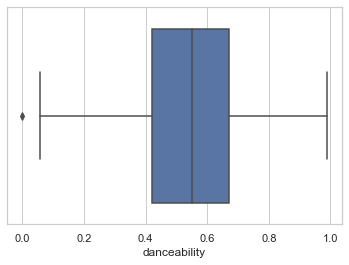

In [152]:
import seaborn as sns
sns.boxplot(x=df['danceability'])

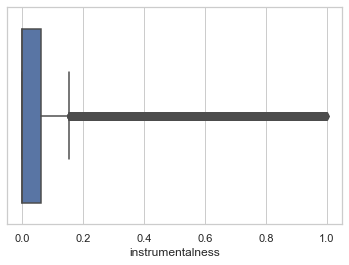

In [153]:
sns.boxplot(x=df['instrumentalness'])

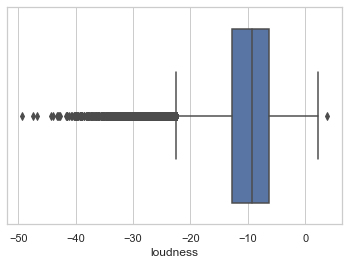

In [154]:
sns.boxplot(x=df['loudness'])

## Data Exploration

In [155]:
# Measuring Central Tendency
df.describe()

Measuring Central Tendency:


danceability        energy           key      loudness          mode  \
count  41106.000000  41106.000000  41106.000000  41106.000000  41106.000000   
mean       0.539695      0.579545      5.213594    -10.221525      0.693354   
std        0.177821      0.252628      3.534977      5.311626      0.461107   
min        0.000000      0.000251      0.000000    -49.253000      0.000000   
25%        0.420000      0.396000      2.000000    -12.816000      0.000000   
50%        0.552000      0.601000      5.000000     -9.257000      1.000000   
75%        0.669000      0.787000      8.000000     -6.374250      1.000000   
max        0.988000      1.000000     11.000000      3.744000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  41106.000000  41106.000000      41106.000000  41106.000000   
mean       0.072960      0.364197          0.154416      0.201535   
std        0.086112      0.338913          0.303530      0.172959   
min        0.000000      0.000000          0.000000      0.013000   
25%        0.033700      0.039400          0.000000      0.094000   
50%        0.043400      0.258000          0.000120      0.132000   
75%        0.069800      0.676000          0.061250      0.261000   
max        0.960000      0.996000          1.000000      0.999000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  41106.000000  41106.000000  4.110600e+04    41106.000000  41106.000000   
mean       0.542440    119.338249  2.348776e+05        3.893689     40.106041   
std        0.267329     29.098845  1.189674e+05        0.423073     19.005515   
min        0.000000      0.000000  1.516800e+04        0.000000      0.000000   
25%        0.330000     97.397000  1.729278e+05        4.000000     27.599793   
50%        0.558000    117.565000  2.179070e+05        4.000000     35.850795   
75%        0.768000    136.494000  2.667730e+05        4.000000     47.625615   
max        0.996000    241.423000  4.170227e+06        5.000000    433.182000   

           sections        target  
count  41106.000000  41106.000000  
mean      10.475673      0.500000  
std        4.871850      0.500006  
min        0.000000      0.000000  
25%        8.000000      0.000000  
50%       10.000000      0.500000  
75%       12.000000      1.000000  
max      169.000000      1.000000

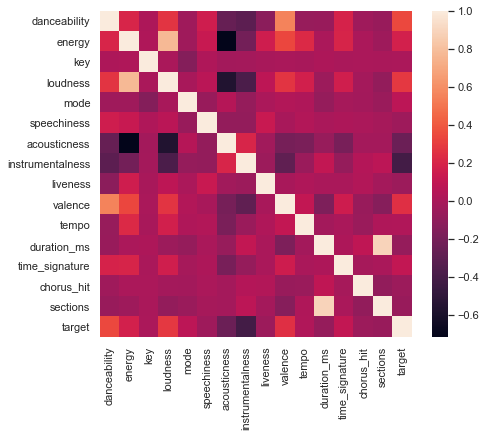

In [166]:
# Correlation Matrix
corr = df.corr()
plt.figure(figsize = (7,6))
sns.heatmap(corr)

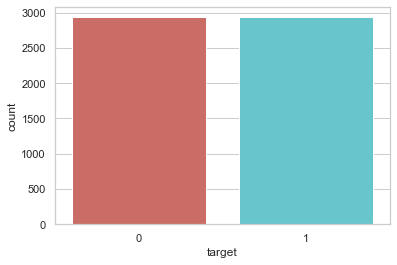

In [157]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df['target'].value_counts()

sns.countplot(x='target',data=data, palette='hls')
plt.show()

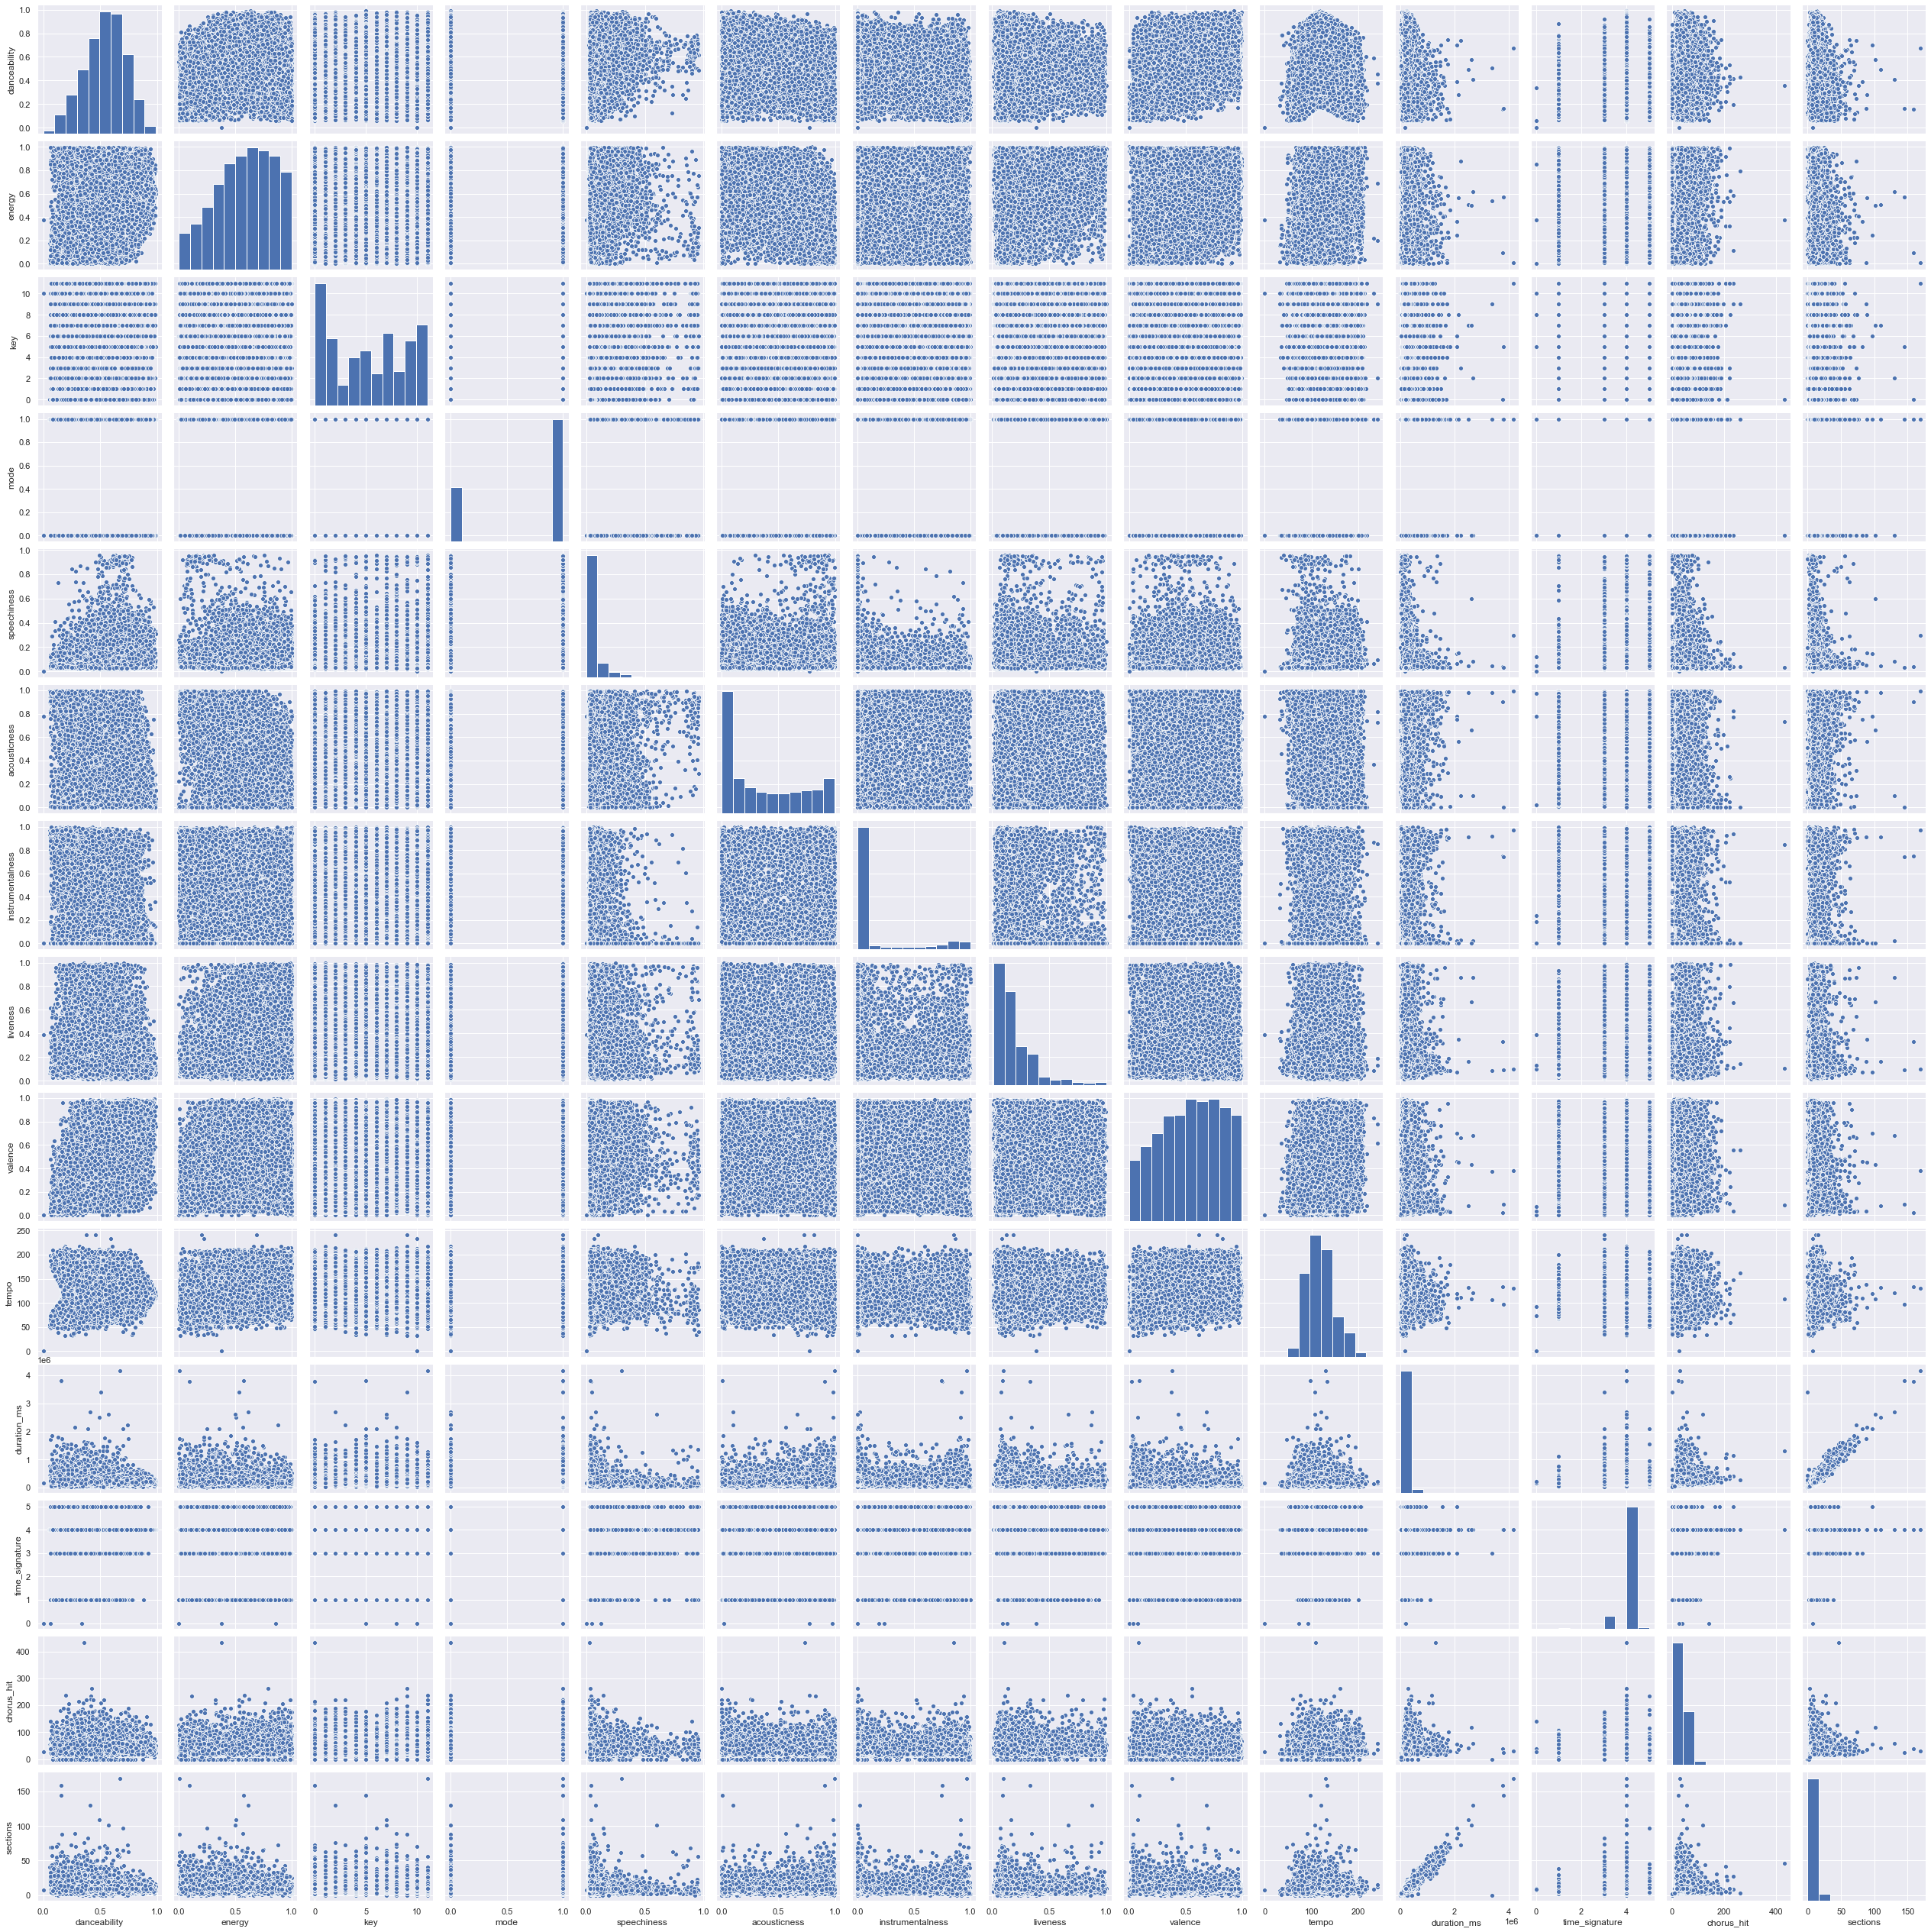

In [168]:
# Plots
sns.set()
cols = ["danceability", "energy", "key", "mode", "speechiness", "acousticness", "instrumentalness", 
            "liveness", "valence", "tempo", "duration_ms", "time_signature", "chorus_hit", "sections"]
sns.pairplot(df[cols], height = 2.5)
plt.show();

## Model

In [200]:
# Features we will use to predict whether a song will be a hit
features = ['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
            'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']

X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis=1), 
                                                    df['target'], test_size=0.30, 
                                                    random_state=1)

In [180]:
# Logistic Regression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print("Logistic Regression Accuracy: " + str(log_accuracy))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy: 0.5933344145313006


In [196]:
# Random Forest Classifier
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)
random_forest_pred = random_forest_clf.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print("Random Forest Classifier Accuracy: " + str(random_forest_accuracy))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Accuracy: 0.7659746999675641


In [198]:
# K-Nearest Neighbors
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.5674667531625041


In [199]:
# Decision Tree Classifier
decision_tree_clf = DecisionTreeClassifier()
decision_tree_clf.fit(X_train, y_train)
decision_tree_pred = decision_tree_clf.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print("Decision Tree Classifier Accuracy: " + str(decision_tree_accuracy))

Decision Tree Classifier Accuracy: 0.7033733376581252
